In [1]:
import plotly.express as px
import pandas as pd
from plotly.offline import plot

In [12]:
data = pd.read_csv('busyworker_output.csv')

In [13]:
data.head(5)

,GOMAXPROCS,Average Time Taken
0,1,6.4
1,1,9.3
2,1,9.3
3,2,88.1
4,2,93.2


In [28]:
data['Average Time Taken'] = pd.to_numeric(data['Average Time Taken'], errors='coerce')
df = data.groupby('GOMAXPROCS')['Average Time Taken'].mean().round(2).reset_index()

In [17]:
df.head()

,GOMAXPROCS,Average Time Taken
0,1,8.33
1,2,91.77
2,3,124.77
3,4,148.10
4,5,133.47


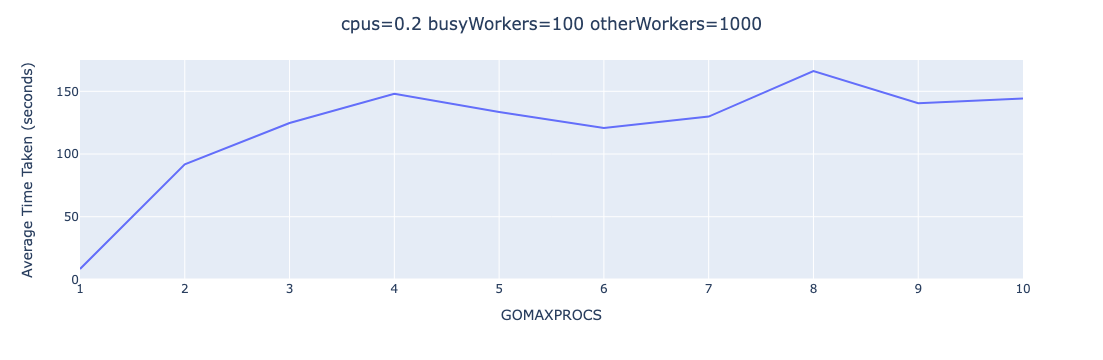

In [32]:
fig = px.line(df, x='GOMAXPROCS', y='Average Time Taken')
fig.update_layout(title={'text':'cpus=0.2 busyWorkers=100 otherWorkers=1000', 'x':0.5}, 
                 yaxis_title='Average Time Taken (seconds)')

In [33]:
html_string = plot(fig, output_type='div')
with open('busyworker_figure.html', 'w') as file:
    file.write(html_string)